# Modul 1.2 Klimasystemet - Toboksmodellen


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from calculate_temp_anomalies import calculate_temp_anomalies

variabel = int(input("Vil du se på historiske data siden 1750, velg 1, hvis du vil se for siste millenium trykk 2\n>> "))
if variabel == 1:
    df=pd.read_csv('historical.csv',index_col = 0,sep=',',encoding = "utf-8")
elif variabel == 2:
    df=pd.read_csv('pmip3.csv',index_col = 0,sep=',',encoding = "utf-8")

Vil du se på historiske data siden 1750, velg 1, hvis du vil se for siste millenium trykk 2
>>  2


<AxesSubplot:title={'center':'Strålingspådriv fra 1750 til i dag'}, xlabel='year', ylabel='W/m^2'>

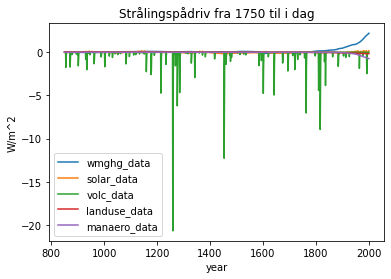

In [13]:
df.index=df.index.astype(int) # årstallene lastes inn som flyttall - her endres de til heltall
df.plot(ylabel="W/m^2",title="Strålingspådriv fra 1750 til i dag") # her lager vi plot fra de dataene som finnes i datafilen

## Hente spesifikke data
Noen ganger ønsker vi å se på verdier fra spesifikke år. Årstallene fungerer som index i datarammen vi har laget med dataene. Vi kan derfor hente ut verdiene fra de ulike årstallene som vist under. Denne metoden vil dere få bruk for i oppgavene senere. Test gjerne ut med ulike årstall. 
`df.loc[årstall]`

In [3]:
df.loc[1900]

wmghg_data      0.456
solar_data     -0.028
volc_data      -0.050
landuse_data   -0.060
manaero_data   -0.266
Name: 1900, dtype: float64

In [4]:
df.loc[1900,'solar_data']

-0.028

### Lete etter verdier
Vi har også mulighet til å lete etter bestemte verdier eller intervaller. Under vises en måte å hente ut data for når pådrivet fra vulkaner er mindre enn $-4 W/m^2$. 

In [5]:
df.loc[df['volc_data']<-4]

,wmghg_data,solar_data,volc_data,landuse_data,manaero_data
year,,,,,
1783,0.024,-0.065,-7.857,-0.013,-0.059
1809,0.142,-0.065,-6.947,-0.024,-0.105
1815,0.145,-0.062,-11.629,-0.026,-0.116
1816,0.144,-0.052,-4.553,-0.026,-0.118
1835,0.150,-0.033,-4.935,-0.034,-0.152


Vi kan også velge å bare vise den kolonnen som vi er interessert i:

In [6]:
df.loc[df['volc_data']<-4,'volc_data']

year
1783    -7.857
1809    -6.947
1815   -11.629
1816    -4.553
1835    -4.935
Name: volc_data, dtype: float64

## Hvilke faktorer ønsker du å ta med i beregningene?
Noen ganger så ønsker man bare å studere effektene av eksempelvis solens aktivitet. Sett parameterne under til 1 eller 0, alt ettersom du ønsker å ha dem med eller ei. I koden under lages en ny dataramme som inneholder totalt pådriv med disse faktorene.

In [7]:
# --------------------
# Forcing switches [n=1 off=0]
# --------------------
switch_ghg=1     # Greenhouse gas forcing on=1 off=0
switch_solar=0   # Solar forcing on=1 off=0
switch_volc=0    # Volcanic forcing on=1 off=0
switch_land=0    # Landuse forcing on=1 off=0
switch_aero=0    # Pollution particle forcing on=1 off=0

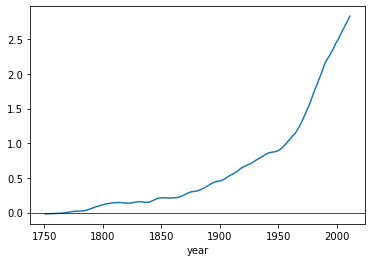

In [8]:
total_forcing = switch_ghg*df['wmghg_data']+switch_solar*df['solar_data']+switch_volc*df['volc_data']+switch_land*df['landuse_data']+switch_aero*df['manaero_data']
total_forcing.plot()
plt.axhline(y=0, linewidth=0.7, color="black")

## Tilbakekoblingsfaktorer

In [19]:
lambda_planck=-3.2    
lambda_lapse=0 #-0.8     
lambda_water=0 #1.8      
lambda_cloud=0 #0.70     
lambda_albedo=0 #0.30    
lambda_other=0 #0.0

lambda_sum=sum([lambda_planck,
    lambda_lapse,
    lambda_water,
    lambda_cloud,
    lambda_albedo,
    lambda_other])

In [20]:
# --------------------
# Deep ocean
# Heat uptake efficency [Wm-2K-1]
# --------------------
# CMIP3
gamma=0 #-0.69  # best guesses [-1 to -0.5]

In [21]:
radiative_forcing = total_forcing.to_numpy()

## Temperaturendringer
Vi ønsker nå å beregne hvordan temperaturen endrer seg som resultat av hvilke strålingspådriv vi har slått på, verdiene vi har satt for tilbakekoblingsmekanismer, og varmeutveksling til havet. 

In [22]:
Ts, To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma) # kaller opp funksjonen som regner ut temperaturendringene

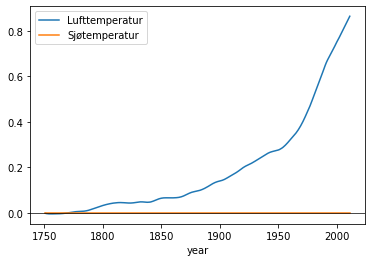

In [23]:
temp = pd.DataFrame(index=df.index) # vi lager en ny dataramme som har samme indexer som pådrivet
temp['Lufttemperatur']=Ts
temp['Sjøtemperatur']=To
temp.plot()
plt.axhline(y=0, linewidth=0.7, color="black")

<AxesSubplot:xlabel='year'>

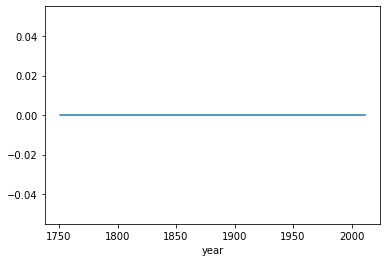

In [24]:
temp['Sjøtemperatur'].plot()

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

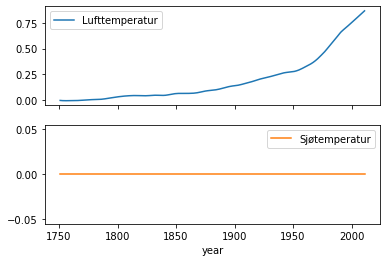

In [25]:
temp.plot(subplots=True)

In [26]:
temp.corrwith(df['solar_data'])

Lufttemperatur    0.539355
Sjøtemperatur          NaN
dtype: float64

### Se verdier for bestemte år
Velg årstallet du ønsker å vite verdiene for

In [27]:
temp.loc[1950]

Lufttemperatur    0.276382
Sjøtemperatur     0.000000
Name: 1950, dtype: float64

### Nå kan du velge å lage et anomali-plott der du trekker fra verdiene fra et bestemt år

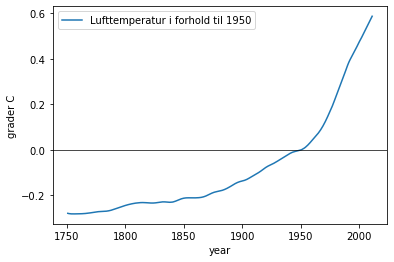

In [28]:
temp2 = pd.DataFrame(index=df.index)
temp2['Lufttemperatur i forhold til 1950']=temp['Lufttemperatur']-temp.at[1950,'Lufttemperatur']
temp2.plot(ylabel='grader C')
plt.axhline(y=0, linewidth=0.7, color="black")